#Logistic NN

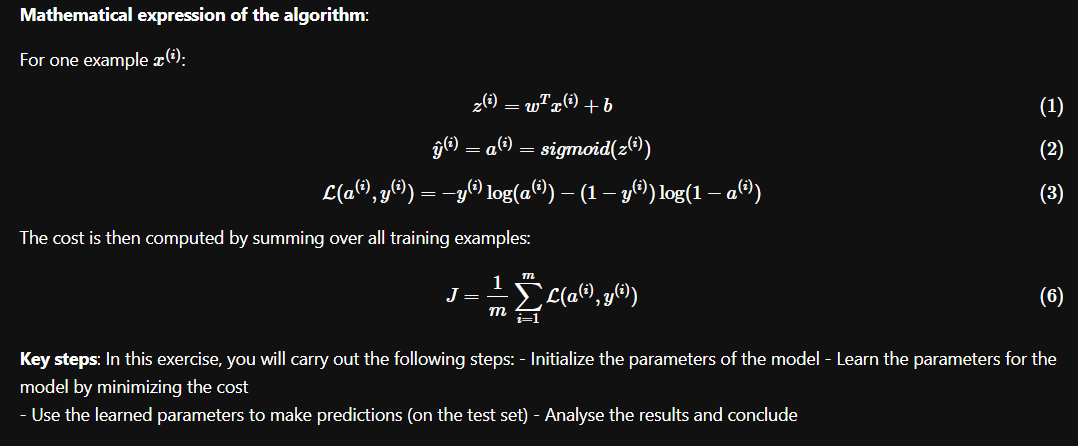

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4706 - accuracy: 0.8758 - val_loss: 0.3086 - val_accuracy: 0.9142 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3043 - accuracy: 0.9153 - val_loss: 0.2864 - val_accuracy: 0.9192 - lr: 9.5000e-04
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9201 - val_loss: 0.2732 - val_accuracy: 0.9243 - lr: 9.0250e-04
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9236 - val_loss: 0.2723 - val_accuracy: 0.9244 - lr: 8.5737e-04
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9255 - val_loss: 0.2708 - val_accuracy: 0.9234 - lr: 8.1451e-04
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2625 - accuracy: 0.9273 - val_loss: 0.2695 - val_accurac

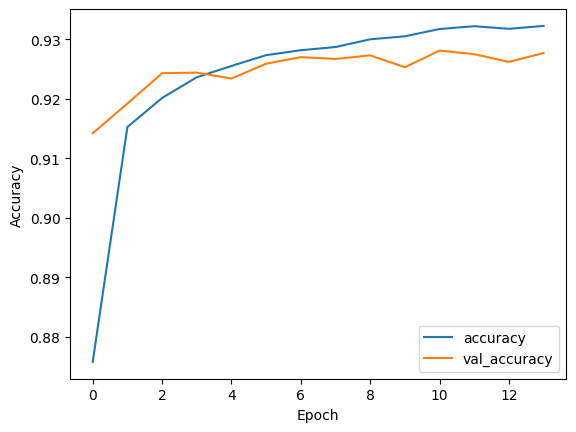

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, optimizers, callbacks
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define logistic regression model using Sequential API
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a vector
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (classes) and softmax activation
])

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define Learning Rate Scheduler callback
lr_scheduler = callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.95 ** epoch)

# Define Early Stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with callbacks
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot training history (accuracy)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()